#Modeling and Interpretations

In [84]:

y = df['T_degC']


y_train, y_test = train_test_split(y, test_size=0.2, random_state=42)


y_train_mean = y_train.mean()


y_pred_baseline = np.repeat(y_train_mean, len(y_test))


baseline_mse = mean_squared_error(y_test, y_pred_baseline)

print(f"Baseline MSE: {baseline_mse}")

Baseline MSE: 17.878791794930986


### Linear Regression

In [20]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.inspection import permutation_importance
from sklearn.model_selection import GridSearchCV

In [75]:
df = df.dropna(subset=['T_degC', 'Salnty'])


X = df[['Salnty']]
y = df['T_degC']


In [76]:
!pip install scikit-learn
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline




imputer = SimpleImputer(strategy='mean')


X_train = df[['Salnty']]
X_train_imputed = imputer.fit_transform(X_train)
y_train = df['T_degC']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train_imputed)

regressor = LinearRegression()
regressor.fit(X_scaled, y_train)

LinearRegression()

In [78]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


numerical_features = ['Salnty']
categorical_features = []

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features),
    ])


pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression()),
])

X_train, X_test, y_train, y_test = train_test_split(df[['Salnty']], df['T_degC'], test_size=0.2, random_state=42)


pipe.fit(X_train, y_train)


y_test_preds = pipe.predict(X_test)

X_train = df[['Salnty']]
y_train = df['T_degC']

pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Salnty']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [])])),
                ('model', LinearRegression())])

In [79]:
lr = pipe.named_steps['model']
coefficients = lr.coef_
names = pipe.named_steps['preprocessor'].get_feature_names_out()
pd.DataFrame(coefficients, names)

,0
num__Salnty,-2.134712


In [80]:
lr.intercept_

10.860287286290273

In [81]:
y_train_preds = pipe.predict(X_train)
mean_squared_error(y_train, y_train_preds)

13.29301614963518

In [82]:
y_test_preds = pipe.predict(X_test)
mean_squared_error(y_test, y_test_preds)

13.290988227423695

In [83]:
r = permutation_importance(pipe, X_test, y_test, n_repeats = 10)
pd.DataFrame(r['importances_mean'], index = X_train.columns.tolist())

,0
Salnty,0.51235


##KNneighbors Regression Model

In [29]:
from sklearn.neighbors import KNeighborsRegressor
X = df[['Salnty']]
y = df['T_degC']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

In [30]:
numerical_features = ['Salnty']
categorical_features = []


numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False)),
])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features),
    ])



pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', KNeighborsRegressor())
])
X = df[['Salnty']]
y = df['T_degC']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)


param_grid = {'model__n_neighbors': [5, 10, 15, 20, 25, 30]}


grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Salnty']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         [])])),
                                       ('model', KNeighborsRegressor())]),
             param_grid={'model__n_neighbors': [5, 10, 15, 20, 25, 30]},
             scoring='neg_mean_squared_error')

In [31]:
grid_search.best_params_

{'model__n_neighbors': 30}

In [32]:
knn = grid_search.best_estimator_

In [33]:
y_train_preds = knn.predict(X_train)
mean_squared_error(y_train, y_train_preds)

10.139926296094876

In [34]:
y_test_preds = knn.predict(X_test)
mean_squared_error(y_test, y_test_preds)

10.32147678313244

In [35]:
r = permutation_importance(knn, X_test, y_test, n_repeats = 10)
pd.DataFrame(r['importances_mean'], index = X_train.columns.tolist())

,0
Salnty,0.885654


##Decision Tree

In [36]:

ohe = OneHotEncoder(sparse_output = False)
encoder = make_column_transformer((ohe,categorical_features), verbose_feature_names_out = False, remainder = 'passthrough')

X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

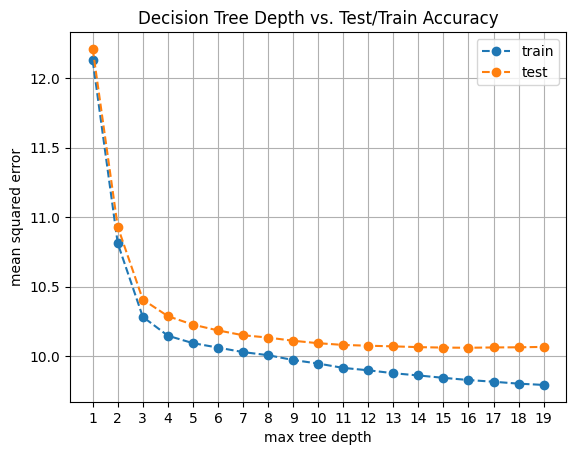

In [37]:
train_scores = []
test_scores = []
for d in range(1, 20):
    dtree = DecisionTreeRegressor(max_depth = d).fit(X_train_encoded, y_train)
    y_train_preds = dtree.predict(X_train_encoded)
    y_test_preds = dtree.predict(X_test_encoded)
    train_scores.append(mean_squared_error(y_train, y_train_preds))
    test_scores.append(mean_squared_error(y_test, y_test_preds))

plt.plot(range(1, 20), train_scores, '--o', label = 'train')
plt.plot(range(1, 20), test_scores, '--o', label = 'test')
plt.grid()
plt.legend()
plt.xticks(range(1, 20))
plt.xlabel('max tree depth')
plt.ylabel('mean squared error')
plt.title('Decision Tree Depth vs. Test/Train Accuracy');

In [38]:
dtree = DecisionTreeRegressor(max_depth = 3).fit(X_train_encoded, y_train)

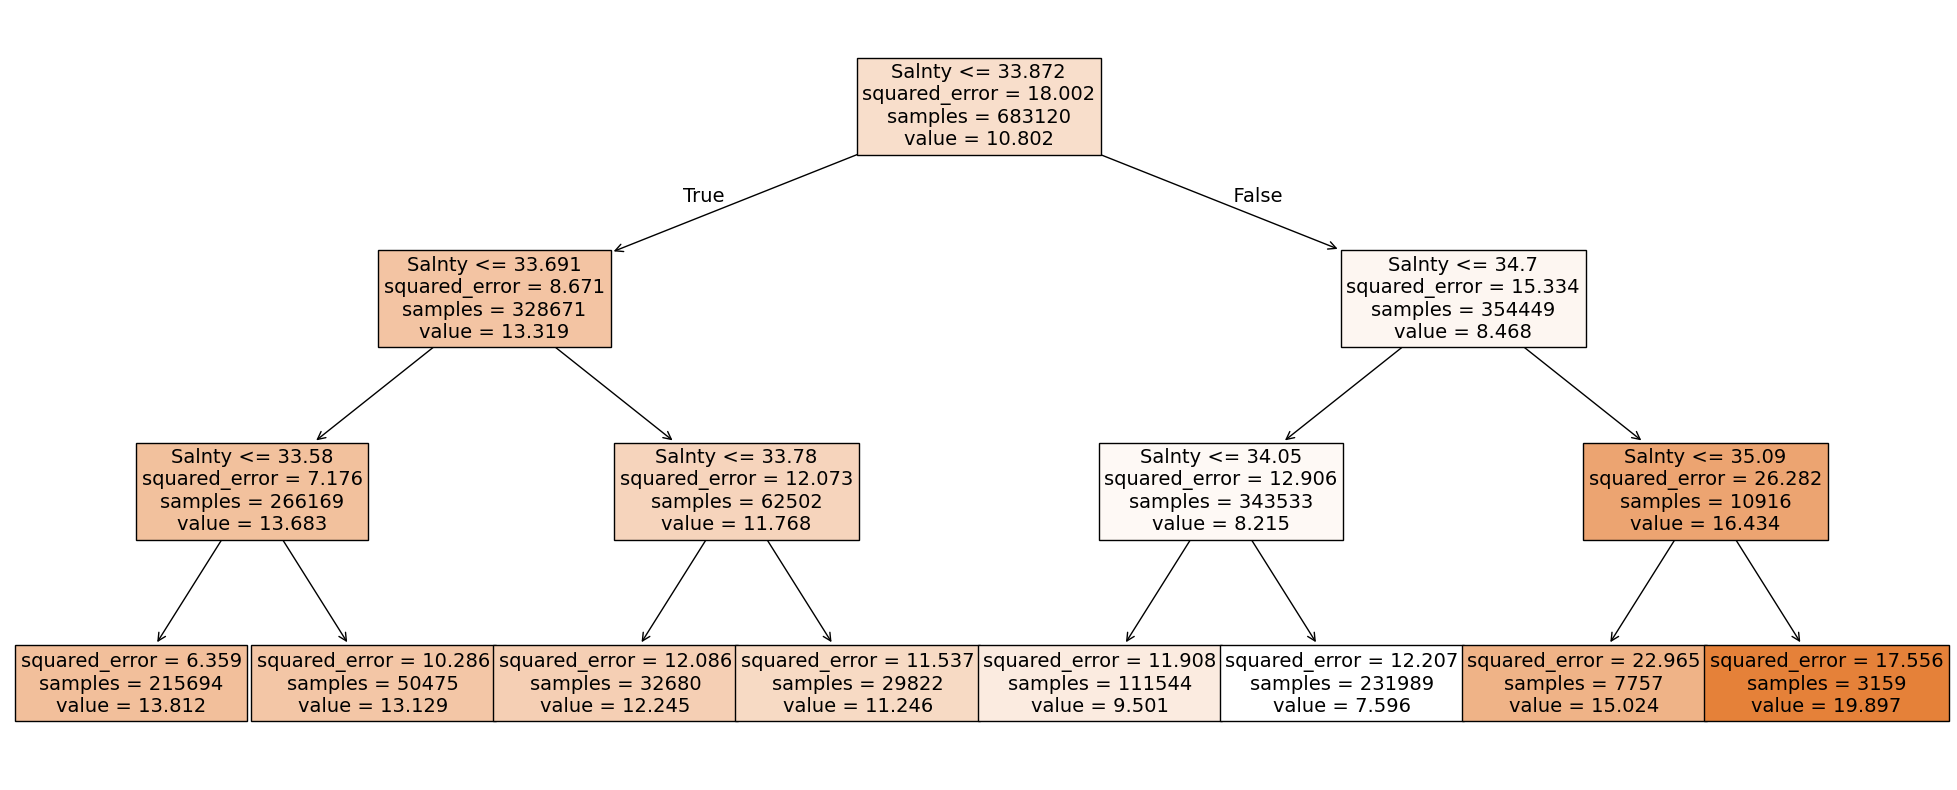

In [39]:
plt.figure(figsize=(25, 10))
plot_tree(dtree, filled=True, feature_names=encoder.get_feature_names_out().tolist(), fontsize=14);

In [40]:
y_train_preds = dtree.predict(X_train_encoded)
mean_squared_error(y_train, y_train_preds)

10.28185654297805

In [41]:
y_test_preds = dtree.predict(X_test_encoded)
mean_squared_error(y_test, y_test_preds)

10.406557382587568

In [42]:
r = permutation_importance(dtree, X_test_encoded, y_test, n_repeats = 10)
pd.DataFrame(r['importances_mean'], index = encoder.get_feature_names_out().tolist())

,0
Salnty,0.849009


##Random Forest

In [85]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


X = df[['Salnty']]
y = df['T_degC']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf_model = RandomForestRegressor(n_estimators=100, random_state=42)


rf_model.fit(X_train, y_train)


y_pred = rf_model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


feature_importances = rf_model.feature_importances_
print(f"Feature Importances: {feature_importances}")

Mean Squared Error: 9.492094490023328
R-squared: 0.46908344259798607
Feature Importances: [1.]


In [88]:
cat_col = []
transformer = make_column_transformer((OneHotEncoder(drop = 'first', sparse_output = False), cat_col), remainder = 'passthrough')

In [105]:
pipe = Pipeline([('encode', transformer), ('model', RandomForestRegressor())])
param_grid = {'model__n_estimators': [50],'model__max_depth': [8]}
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as a different type depending on the ColumnTransformer inputs.
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  *,


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('encode',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(drop='first',
                                                                                       sparse_output=False),
                                                                         [])])),
                                       ('model', RandomForestRegressor())]),
             param_grid={'model__max_depth': [8], 'model__n_estimators': [50]},
             scoring='neg_mean_squared_error')

In [106]:
grid_search.best_params_

{'model__max_depth': 8, 'model__n_estimators': 50}

In [107]:
y_train_preds = rf_model.predict(X_train)
mean_squared_error(y_train, y_train_preds)

9.291709791851535

In [108]:
y_test_preds = rf_model.predict(X_test)
mean_squared_error(y_test, y_test_preds)

9.492094490023328

In [109]:
r = permutation_importance(rf_model, X_test, y_test, n_repeats = 10)
pd.DataFrame(r['importances_mean'], index = X_train.columns.tolist())

,0
Salnty,0.944596
